#  "Haters gonna (make you) hate: 
## il Negative Campaign come predittore di hate speech online nelle elezioni europee del 2019 in Italia"

##### Author: Salvatore Romano
#### Relatrice: prof. Suitner,  Co-relatrice: prof. Carraro
Date: 2020  


In [4]:
#Importing (and installing) packages

import pandas as pd #pip3 install pandas
import numpy as np
import matplotlib.pyplot as plt #pip3 install matplotlib
import re
import numpy as np
from sklearn.linear_model import LinearRegression  #pip3 install sklearn
import statsmodels
import statsmodels.api as sm
from scipy import stats
from IPython.core.display import HTML
import statsmodels.formula.api as smf
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())
import researchpy as rp  #pip3 install researchpy
import scipy.stats as stats


In [5]:
#Import the DB

com = pd.read_csv(r"com_liwc.csv", sep='\t', engine='python')


#print (com)

       Origin_file_order     Site                           p_id  \
0                  30126       FB  96844400700_10157493758850701   
1                  30226       FB  96844400700_10157493758850701   
2                  60063       FB  96844400700_10157493758850701   
3                  60852       FB  96844400700_10157493758850701   
4                  61557       FB  96844400700_10157493758850701   
...                  ...      ...                            ...   
78170              70705  Twitter          1.11852926516164E+018   
78171              43288  Twitter          1.11846561220288E+018   
78172              70478  Twitter          1.11825025930045E+018   
78173              69430  Twitter          1.11824474991438E+018   
78174              45602  Twitter          1.11780731706662E+018   

                dateCreated      p_politician p_gender p_GRUPPO_PE  \
0      2019-04-23T10:33:37Z  MARCELLO GEMMATO        M         PPE   
1      2019-04-23T10:33:37Z  MARCELLO GEMMA

In [6]:
#Check some info
print('Number of colums in Dataframe : ', len(com.columns))
print('Number of rows in Dataframe : ', len(com.index))


Number of colums in Dataframe :  243
Number of rows in Dataframe :  78175


In [7]:
#Create the df

comDB = pd.DataFrame(data=com)
comDB['Count']=1

pd.set_option('display.max_columns', None)

comDB


,Origin_file_order,Site,p_id,dateCreated,p_politician,p_gender,p_GRUPPO_PE,p_LISTA,p_PARTITO,p_governo,p_dx_sx,p_CIRCOSCRIZIONE,p_text,p_favoriteCount,p_shareCount,p_replyCount,p_replyEval,p_numComments,p_numFakeTags,p_rating,p_category,p_topic,p_campagna,p_camapagna2,Target1,Target2,p_targe1-2,target1_s-p,target1_pol,c_text,c_level,c_replyToUser,c_replyToText,c_rating,c_rating3,c_ratingCivile,c_ratingPosNeg,c_category,Unnamed: 38,c_topic,isPersonal,c_WC,c_WPS,c_Sixltr,c_Dic,c_pronomi,c_Io,c_Noi,c_Se,c_Tu,c_Altri,c_Negazio,c_Consen,c_Articol,c_Prepos,c_Numero,c_Affett,c_Sen_Pos,c_Emo_Pos,c_Ottimis,c_Emo_Neg,c_Ansia,c_Rabbia,c_Tristez,c_Mec_Cog,c_Causa,c_Intros,c_Discrep,c_Inibiz,c_possib,c_Certez,c_Proc_Sen,c_Vista,c_Udito,c_Sentim,c_Social,c_Comm,c_Rif_gen,c_amici,c_Famigl,c_Umano,c_Tempo,c_Passato,c_Present,c_Futuro,c_Spazio,c_Sopra,c_Sotto,c_Inclusi,c_Esclusi,c_Movimen,c_Occupaz,c_Scuola,c_Lavoro,c_Raggiun,c_Svago,c_Casa,c_Sport,c_TV_it,c_Musica,c_Soldi,c_Metafis,c_religio,c_Morte,c_Fisico,c_Corpo,c_Sesso,c_Mangiare,c_Dormire,c_Cura_cor,c_parolac,c_Non_flu,c_riempiti,c_Voi,c_Lui_lei,c_Loro,c_Condizio,c_Transiti,c_P_pass,c_gerundio,c_Passivo,c_Essere,c_Avere,c_Formale,c_Io_Ver,c_Tu_Verbo,c_Lui_Verb,c_Noi_Verb,c_Voi_Verb,c_Loro_Ver,c_AllPunc,c_Period,c_Comma,c_Colon,c_SemiC,c_Qmark,c_Exclam,c_Dash,c_Quote,c_Apostro,c_Parenth,c_OtherP,p_WC,p_WPS,p_Sixltr,p_Dic,p_pronomi,p_Io,p_Noi,p_Se,p_Tu,p_Altri,p_Negazio,p_Consen,p_Articol,p_Prepos,p_Numero,p_Affett,p_Sen_Pos,p_Emo_Pos,p_Ottimis,p_Emo_Neg,p_Ansia,p_Rabbia,p_Tristez,p_Mec_Cog,p_Causa,Ip_ntros,p_Discrep,Ip_nibiz,p_possib,p_Certez,p_Proc_Sen,p_Vista,p_Udito,p_Sentim,p_Social,p_Comm,p_Rif_gen,p_amici,p_Famigl,p_Umano,p_Tempo,p_Passato,p_Present,p_Futuro,p_Spazio,p_Sopra,p_Sotto,Ip_nclusi,p_Esclusi,p_Movimen,p_Occupaz,p_Scuola,p_Lavoro,p_Raggiun,p_Svago,p_Casa,p_Sport,p_TV_it,p_Musica,p_Soldi,p_Metafis,p_religio,p_Morte,p_Fisico,p_Corpo,p_Sesso,p_Mangiare,p_Dormire,p_Cura_cor,p_parolac,p_Non_flu,p_riempiti,p_Voi,p_Lui_lei,p_Loro,p_Condizio,p_Transiti,p_P_pass,p_gerundio,p_Passivo,p_Essere,p_Avere,p_Formale,p_Io_Ver,p_Tu_Verbo,p_Lui_Verb,p_Noi_Verb,p_Voi_Verb,p_Loro_Ver,p_AllPunc,p_Period,p_Comma,p_Colon,p_SemiC,p_Qmark,p_Exclam,p_Dash,p_Quote,p_Apostro,p_Parenth,p_OtherP,Count
0,30126,FB,96844400700_10157493758850701,2019-04-23T10:33:37Z,MARCELLO GEMMATO,M,PPE,FDI,FDI,opposizione,destra,s,Se i musulmani pensano di portare la guerra sa...,270,80,57,33,1729,0,problematico,Rifugiati Musulmani,religioni europa,Comparativa,Neg-comp,Categoria di persone,NaN,Categoria di persone,gruppo,non politico,C'è poco da dire questa è gente che la guerra ...,1,FRATELLIDITALIA.PUGLIA,Se i musulmani pensano di portare la guerra sa...,problematico,probl-hate,incivile,negativo,Rifugiati Musulmani,NaN,Other,Other,4,2.0,50.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.00,0.00,0,0.00,0.0,0.00,0.00,0.0,0.0,125.00,100.00,0.00,0.0,0.0,0.00,25.00,0.0,0.0,0.00,0.0,0.00,6,6.00,33.33,33.33,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,33.33,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0,0.00,0.00,0,0.00,0.0,0.00,0.0,0.0,0.0,16.67,16.67,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1
1,30226,FB,96844400700_10157493758850701,2019-04-23T10:33:37Z,MARCELLO GEMMATO,M,PPE,FDI,FDI,opposizione,destra,s,Se i musulmani pensano di portare la guerra sa...,270,80,57,33,1729,0,problematico,Rifugiati Musulmani,religioni europa,Comparativa,Neg-comp,Categoria di persone,NaN,Categoria di persone,grup

In [8]:
#Creating some reduction of the df

# 1) postDB
# a df with just the single posts made by politicians
postDB = comDB.drop_duplicates('p_text')

# 2) comHS 
# a df with just the hate speech comments
comHS = comDB.loc[comDB['c_rating'] == 'problematico']

# 3) negcompcomDB  
# a df with all the comments answering to negative and comparative campaigns
negcomDB = comDB.loc[comDB['p_campagna']== 'Negativa']
compcomDB = comDB.loc[comDB['p_campagna']== 'Comparativa']
negcompcomDB = pd.concat([compcomDB,negcomDB])

# 4) negcomppostDB
# a df with all the posts with negative and comparative campaigns
negpostDB = postDB.loc[postDB['p_campagna']== 'Negativa']
comppostDB = postDB.loc[postDB['p_campagna']== 'Comparativa']
negcomppostDB = pd.concat([comppostDB,negpostDB])


# print the new variables:
#comHS.head()
#postDB
#negcompcomDB.head()
#negcomppostDB.head()

## Type of campaign
##### What is the most used type of campaign?

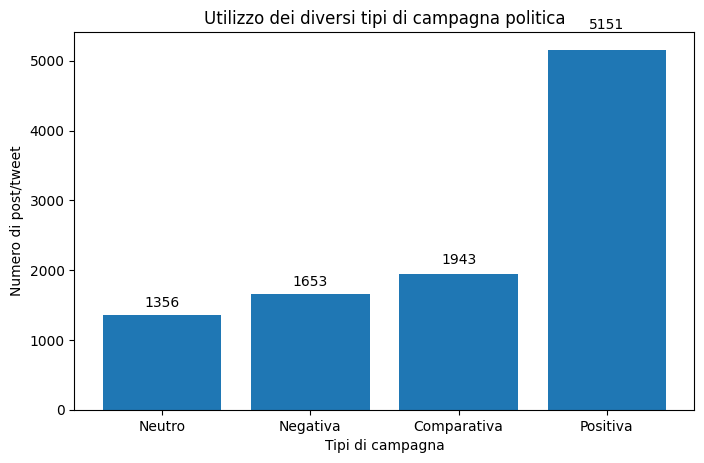

In [9]:
# BAR-CHART: Type of campaign

# variables
a = postDB.groupby('p_campagna').count()
a = a.sort_values('Count')
a = a.Count

# Graphs info        --> fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.figure(figsize=(8,5), dpi=100)
plt.title('Utilizzo dei diversi tipi di campagna politica')
plt.xlabel ('Tipi di campagna')
plt.ylabel ('Numero di post/tweet')
width = 0.35

rects = plt.bar(a.index, height=a)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects)

plt.savefig('tipoDiCampagna.png', dpi=350)

plt.show()


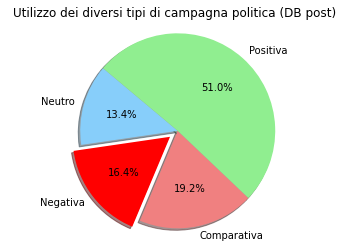

In [10]:
# PIE-CHART: type of campaign

a = postDB.groupby('p_campagna').count()
a = a.sort_values('Count')
a = a.Count


labels = a.index
sizes = a
colors = ['lightskyblue', 'red', 'lightcoral', 'lightgreen']
explode = (0.0, 0.1, 0.0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Utilizzo dei diversi tipi di campagna politica (DB post)')

plt.savefig('tipoDiCampagnapie.png', dpi=350)

plt.show()


# Who used the negative campaign?

### Opposition or the Government?

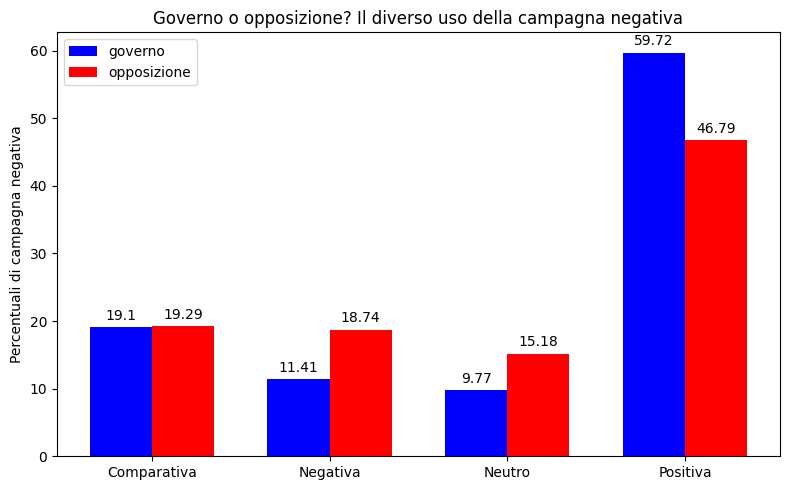

In [14]:
# The use of negative campaign: Opposition or the Government?

# create the new DB
b = postDB.loc[postDB['p_governo'] == 'governo']
b = b.groupby(['p_campagna']).count()
var1 = b.Count.transform(lambda x: x/x.sum()*100).round(2)

b2 = postDB.loc[postDB['p_governo'] == 'opposizione']
b2 = b2.groupby(['p_campagna']).count()
var2 = b2.Count.transform(lambda x: x/x.sum()*100).round(2)


# take the right part of the new DB
labels = b.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - width/2, var1, width, label='governo', color='b',)
rects2 = ax.bar(x + width/2, var2, width, label='opposizione', color='r', )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentuali di campagna negativa')
ax.set_title('Governo o opposizione? Il diverso uso della campagna negativa')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('governo.png', dpi=300)

plt.show()

In [ ]:



# #### The political spectrum: left or right?
#
# With this division we have two problems:
# - we don't know if M5S is left or right for sure.
# - we have a left-right governament lowering the barriers between lf-rg even more.
#
# Overwhere, the political spectrum division shows us that the levels of comparative campaing is equal across left and right (as well as governament-opposition).
#
# In general the differences between the two sides is less defined than comparign opposition to government, idicating that the first division is more useful to explain the reasons of the political campaign use.

# #### Chi square
# https://www.pythonfordatascience.org/chi-square-test-of-independence-python/

# In[196]:


# The use of negative campaign: oposition or govern?

# create the new DB
ba = postDB.loc[postDB['p_dx_sx'] == 'destra']
ba = ba.groupby(['p_campagna']).count()
var1 = ba.Count.transform(lambda x: x/x.sum()*100).round(2)

ba2 = postDB.loc[postDB['p_dx_sx'] == 'sinistra']
ba2 = ba2.groupby(['p_campagna']).count()
var2 = ba2.Count.transform(lambda x: x/x.sum()*100).round(2)



# take the right part of the new DB
labels = ba.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - width/2, var1, width, label='destra', color='b', )
rects2 = ax.bar(x + width/2, var2, width, label='sinistra', color='r', )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentuali di campagna negativa')
ax.set_title('Destra o sinistra? Il diverso uso della campagna negativa')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('destra.png', dpi=300)

plt.show()


# In[6]:


print (rp.summary_cat(postDB[["p_campagna", "p_governo"]]))
crosstab = pd.crosstab(postDB["p_campagna"], postDB["p_governo"])

print ('------------------------------------------------------------')
print (crosstab)

stats.chi2_contingency(crosstab)
# firts number is the relationship between the two variables  $\chi^2$ test static
# second number is the p vale
# the third number is the degrees of freedom
#  An array is also returned which contains the expected cell counts.


# In[7]:


crosstab, test_results, expected = rp.crosstab(postDB["p_campagna"], postDB["p_governo"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print (crosstab)

test_results


# ### Regression: governament or political spectrum?

# In[9]:


crosstab, test_results, expected = rp.crosstab(postDB["p_campagna"], postDB["p_dx_sx"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print (crosstab)

test_results


# ## m5s = sx

# In[10]:


# creating a new varibale
import pandas as pd
import numpy as np

sxm5s = []
for row in postDB['p_PARTITO']:
    if row == 'PD' :    sxm5s.append('sx')
    elif row == 'M5S':  sxm5s.append('sx')
    elif row == 'FDI':  sxm5s.append('dx')
    elif row == 'Lega':  sxm5s.append('dx')
    elif row == 'FI':  sxm5s.append('dx')
    elif row == '+ Europa' :  sxm5s.append('sx')
    elif row == 'Possibile' :  sxm5s.append('sx')
    elif row == 'La Sinistra' :  sxm5s.append('sx')
    elif row == 'NaN' :  sxm5s.append('altro')
    else:           sxm5s.append('altro')
# Create a column from the list
postDB ['p_dx_sxm5s'] = sxm5s
# View the new dataframe
print(postDB['p_dx_sxm5s'])


# In[195]:


# The use of negative campaign: oposition or govern?

# create the new DB
bd = postDB.loc[postDB['p_dx_sxm5s'] == 'dx']
bd = bd.groupby(['p_campagna']).count()
var1 = bd.Count.transform(lambda x: x/x.sum()*100).round(2)

bd2 = postDB.loc[postDB['p_dx_sxm5s'] == 'sx']
bd2 = bd2.groupby(['p_campagna']).count()
var2 = bd2.Count.transform(lambda x: x/x.sum()*100).round(2)


# take the right part of the new DB
labels = bd.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - width/2, var1, width, label='destra', color='b', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x + width/2, var2, width, label='sinistra', color='r', error_kw=dict(elinewidth=6, ecolor='yellow'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percent of campagin type')
ax.set_title('right or left: different use of political campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

plt.savefig('b.png', dpi=300)


# In[12]:


crosstab, test_results, expected = rp.crosstab(postDB["p_campagna"], postDB["p_dx_sxm5s"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print (crosstab)

test_results


# In[98]:


model=sm.OLS(" c_rating_hate ~ C(signplur, Sum) ", targetDB).fit()
print (model.summary())


# #### The parities and thier use of political campaigns
# Among the 4 parties who produced the biggest ammount of online political campaign (Lega, PD, M5S, FDI), M5S and Lega (who were at the government during european elections) have done much more positive campaign than oters parties, and less negative one.
#
#
#
# Comparative post are almost equal among PD,Lega adn FDI, confirming again that this type of campaign is more or less equally used among parties and political sides. Just the M5S, who have done much more positive campaign than all the others, have less comparative campaign.

# In[194]:


# The use of negative campaign: oposition or govern?

# create the new DB
c = postDB.loc[postDB['p_PARTITO'] == 'Lega']
c = c.groupby(['p_campagna']).count()
var1 = c.Count.transform(lambda x: x/x.sum()*100).round(1)

c2 = postDB.loc[postDB['p_PARTITO'] == 'PD']
c2 = c2.groupby(['p_campagna']).count()
var2 = c2.Count.transform(lambda x: x/x.sum()*100).round(1)

c3 = postDB.loc[postDB['p_PARTITO'] == 'M5S']
c3 = c3.groupby(['p_campagna']).count()
var3 = c3.Count.transform(lambda x: x/x.sum()*100).round(1)

c4 = postDB.loc[postDB['p_PARTITO'] == 'FDI']
c4 = c4.groupby(['p_campagna']).count()
var4 = c4.Count.transform(lambda x: x/x.sum()*100).round(1)

#c5 = postDB.loc[postDB['p_PARTITO'] == 'FI']
#c5 = c5.groupby(['p_campagna']).count()
#var5 = c5.Count.transform(lambda x: x/x.sum()).round(2)

# take the right part of the new DB
labels = c.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='Lega', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x - width , var3, width, label='M5S', color='yellow', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x 2*width + 0.06, var5, width, label='FI', color='blue', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + 0.06 , var4, width, label='FDI', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x + width + 0.06, var2, width, label='PD', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))

9
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentuali di campagna negativa')
ax.set_title('I principali partiti: il diverso uso della campagna negativa')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.savefig('partiti.png', dpi=300)

plt.show()


# In[38]:


crosstab, test_results, expected = rp.crosstab(postDB["p_campagna"], postDB["p_PARTITO"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
plt.savefig('crosstab.png')
print (crosstab)


test_results


# In[33]:


#h = postDB[['p_campagna', 'p_PARTITO']].groupby(['p_campagna', 'p_PARTITO']).count()
h = postDB.loc[postDB['Site']=='FB']
h = rp.crosstab(h["p_campagna"], h["p_PARTITO"], prop='col')

i = postDB.loc[postDB['Site']=='Twitter']
i = rp.crosstab(i["p_campagna"], i["p_PARTITO"], prop='col')

f = h - i
f


# In[137]:


i = postDB.groupby(['p_campagna', 'Site', 'p_PARTITO'])['Count'].count()
print(i)


# In[192]:


# campagna e sito

# create the new DB
bd = postDB.loc[postDB['Site'] == 'FB']
bd = bd.groupby(['p_campagna']).count()
var1 = bd.Count.transform(lambda x: x/x.sum()*100).round(2)

bd2 = postDB.loc[postDB['Site'] == 'Twitter']
bd2 = bd2.groupby(['p_campagna']).count()
var2 = bd2.Count.transform(lambda x: x/x.sum()*100).round(2)


# take the right part of the new DB
labels = bd.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - width/2, var1, width, label='Facebook', color='#3b5998', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x + width/2, var2, width, label='Twitter', color='#00aced', error_kw=dict(elinewidth=6, ecolor='yellow'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentuali di campagna politica')
ax.set_title('Twitter e Facebook: il diverso utilizzo dei tipi di campagna')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('site.png', dpi=300)
plt.show()


# In[191]:


# The use of negative campaign: oposition or govern?

# create the new DB
c = postDB.loc[postDB['Site'] == 'FB']
c = c.loc[postDB['p_PARTITO'] == 'Lega']
c = c.groupby(['p_campagna']).count()
var1 = c.Count.transform(lambda x: x/x.sum()*100).round(2)

c2 = postDB.loc[postDB['Site'] == 'FB']
c2 = c2.loc[postDB['p_PARTITO'] == 'PD']
c2 = c2.groupby(['p_campagna']).count()
var2 = c2.Count.transform(lambda x: x/x.sum()*100).round(2)

c3 = postDB.loc[postDB['Site'] == 'FB']
c3 = c3.loc[postDB['p_PARTITO'] == 'M5S']
c3 = c3.groupby(['p_campagna']).count()
var3 = c3.Count.transform(lambda x: x/x.sum()*100).round(2)

c4 = postDB.loc[postDB['Site'] == 'FB']
c4 = c4.loc[postDB['p_PARTITO'] == 'FDI']
c4 = c4.groupby(['p_campagna']).count()
var4 = c4.Count.transform(lambda x: x/x.sum()*100).round(2)

#c5 = postDB.loc[postDB['p_PARTITO'] == 'FI']
#c5 = c5.groupby(['p_campagna']).count()
#var5 = c5.Count.transform(lambda x: x/x.sum()).round(2)

# take the right part of the new DB
labels = c.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='Lega', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x - width , var3, width, label='M5S', color='yellow', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x 2*width + 0.06, var5, width, label='FI', color='blue', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + 0.06 , var4, width, label='FDI', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x + width + 0.06, var2, width, label='PD', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))

9
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentuali di campagna negativa')
ax.set_title('I principali partiti: il diverso uso della campagna negativa su Facebook')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.savefig('partitifb.png', dpi=300)

plt.show()


# In[190]:


# The use of negative campaign: oposition or govern?

# create the new DB
c = postDB.loc[postDB['Site'] == 'Twitter']
c = c.loc[postDB['p_PARTITO'] == 'Lega']
c = c.groupby(['p_campagna']).count()
var1 = c.Count.transform(lambda x: x/x.sum()*100).round(1)

c2 = postDB.loc[postDB['Site'] == 'Twitter']
c2 = c2.loc[postDB['p_PARTITO'] == 'PD']
c2 = c2.groupby(['p_campagna']).count()
var2 = c2.Count.transform(lambda x: x/x.sum()*100).round(1)

c3 = postDB.loc[postDB['Site'] == 'Twitter']
c3 = c3.loc[postDB['p_PARTITO'] == 'M5S']
c3 = c3.groupby(['p_campagna']).count()
var3 = c3.Count.transform(lambda x: x/x.sum()*100).round(1)

c4 = postDB.loc[postDB['Site'] == 'Twitter']
c4 = c4.loc[postDB['p_PARTITO'] == 'FDI']
c4 = c4.groupby(['p_campagna']).count()
var4 = c4.Count.transform(lambda x: x/x.sum()*100).round(1)

#c5 = postDB.loc[postDB['p_PARTITO'] == 'FI']
#c5 = c5.groupby(['p_campagna']).count()
#var5 = c5.Count.transform(lambda x: x/x.sum()).round(2)

# take the right part of the new DB
labels = c.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='Lega', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x - width , var3, width, label='M5S', color='yellow', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x 2*width + 0.06, var5, width, label='FI', color='blue', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + 0.06 , var4, width, label='FDI', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x + width + 0.06, var2, width, label='PD', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))

9
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentuali di campagna negativa')
ax.set_title('I principali partiti: il diverso uso della campagna negativa su Twitter')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.savefig('partititw.png', dpi=300)

plt.show()


# In[24]:


#a = postDB.loc[postDB['Site'] == 'Twitter']
#a = a.groupby('p_campagna').p_text.apply(lambda x: x.str.split().str.len().mean()).round(2)

b = postDB.loc[postDB['Site'] == 'Twitter']
b = b.groupby('p_campagna').p_text.apply(lambda x: x.str.split().str.len().std())
b


# In[ ]:





# In[ ]:





# ## 3) Rating: the hate levels

# In[166]:


# How much hate do we have in the comments?

# variables
f = comDB.groupby('c_rating').count()
f = f.sort_values('Count')
f = f.Count

# Graphs info        --> fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.figure(figsize=(8,5), dpi=100)
plt.title('Livelli di odio nei commenti')
plt.xlabel ('Livelli di odio')
plt.ylabel ('Numero di commenti')
width = 0.35

# X and Y axis scale
#plt.xticks(comDB.c_rating.index)
#plt.yticks([0,100, 1000, 50000])

# graphs

rects = plt.bar(f.index, height=f)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects)

plt.savefig('odio.png', dpi=300)

plt.show()


# In[171]:


f = comDB.groupby('p_rating').count()
f = f.Count.transform(lambda x: x/x.sum()).round(2)
f


# In[239]:


# Data to plot
a = comDB.groupby('p_campagna').count()
a = a.sort_values('Count')
a = a.Count


labels = a.index
sizes = a
colors = ['lightskyblue', 'red', 'lightcoral', 'lightgreen']
explode = (0.0, 0.1, 0.0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Utilizzo dei diversi tipi di campagna politica (DB commenti)')

#plt.savefig('tipoDiCampagnapie2.png', dpi=350)

plt.show()


# In[244]:


a = comDB.groupby('p_campagna').count()
a = a.sort_values('Count')
a = a.Count

22.3 + 22.5


# ### Relation between the type of campaign and the post rating
# Is negative campaign more problematic?
#

# In[30]:


# Is negative campaign more problematic?

# create the new DB
#z = postDB.loc[postDB['p_rating'] == 'ambiguo']
#z = z.groupby(['p_campagna']).count()
#z = z.Count

z2 = postDB.loc[postDB['p_rating'] == 'problematico']
z2 = z2.groupby(['p_campagna']).count()
z2 = z2.Count

z3 = postDB.loc[postDB['p_rating'] == 'negativo']
z3 = z3.groupby(['p_campagna']).count()
z3 = z3.Count

z4 = postDB.loc[postDB['p_rating'] == 'positivo']
z4 = z4.groupby(['p_campagna']).count()
z4 = z4.Count

# take the right part of the new DB
labels = z2.index
#var1 = z
var2 = z2
var3 = z3
var4 = z4

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
#rects1 = ax.bar(x - 2*width, var1, width, label='hate', color='black',)
rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', )
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', )
rects5 = ax.bar(x  - width, var2, width, label='problematico', color='red', )


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rating of the posts')
ax.set_title('Rating of the posts and the relation with campaign types')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
autolabel(rects2)
autolabel(rects5)
autolabel(rects4)


fig.tight_layout()

plt.show()

plt.savefig('z.png', dpi=300)


# #### Negative and comparative campaign often use insults and non-civil lenguage
#
# ##### Problematic
# We can see that more than 86% of the problematic posts published by the politicians are negative and comparative campaigns. In general, politicians haven't done hate speech posts and they haven't done many problematic posts, but the magiority of them is concentrated in the non-positive campaing posts.
#
# #####  Negative
# While problematic post are more related to comparative campaign, the negative post are prevalentely present in the negative campaing, it seems that when a politician makes a comparison with a collegue or rival parties is inclined to use more insults and volgar senteces.
#
# Overwhere, the general negativity (negative and problematic) is is decidedly more widespread among negative campaign posts.

# In[172]:


# Is negative campaign more problematic?

# create the new DB
#z = postDB.loc[postDB['p_rating'] == 'ambiguo']
#z = z.groupby(['p_campagna']).count()
#z = z.Count

za2 = postDB.loc[postDB['p_rating'] == 'problematico']
za2 = za2.groupby(['p_campagna']).count()
var2 = za2.Count.transform(lambda x: x/x.sum()).round(2)

za3 = postDB.loc[postDB['p_rating'] == 'negativo']
za3 = za3.groupby(['p_campagna']).count()
var3 = za3['Count'].transform(lambda x: x/x.sum()).round(2)

za4 = postDB.loc[postDB['p_rating'] == 'positivo']
za4 = za4.groupby(['p_campagna']).count()
var4 = za4.Count.transform(lambda x: x/x.sum()).round(2)

za5 = postDB.groupby(['p_campagna']).count()
var5 = za5.Count.transform(lambda x: x/x.sum()).round(2)

# take the right part of the new DB
labels = za2.index
#var1 = z

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
#rects1 = ax.bar(x - 2*width, var1, width, label='hate', color='black',)
rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', )
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', )
rects5 = ax.bar(x  - width, var2, width, label='problematico', color='red', )
rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*', error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rating of the posts, percent')
ax.set_title('Rating of the posts and the relation with campaign types')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
autolabel(rects2)
autolabel(rects5)
autolabel(rects4)
autolabel(rects3)


fig.tight_layout()

plt.show()

plt.savefig('za.png', dpi=300)


# In[ ]:


postDBd = pd.get_dummies(postDB, columns=['p_campagna', 'p_rating'])   #* p_PARTITO_Lega  * p_PARTITO_PD
postDBd


# In[173]:



model=sm.MNLogit.from_formula(" p_campagna_Comparativa  ~  p_rating_problematico + p_rating_negativo ", postDBd).fit()
print (model.summary())

model=sm.MNLogit.from_formula(" p_campagna_Negativa  ~  + p_rating_problematico + p_rating_negativo", postDBd).fit()
print (model.summary())


# #### What types of political campaign generate more hate in the comments?
#
# Here the count of the comments, not the percentage

# In[229]:


# how much hate is generated by each type of political campaign?

# create the new DB
ga = comDB.loc[comDB['c_rating'] == 'hate']
ga = ga.groupby(['p_campagna']).count()
var1 = ga.Count

ga2 = comDB.loc[comDB['c_rating'] == 'problematico']
ga2 = ga2.groupby(['p_campagna']).count()
var2 = ga2.Count

ga3 = comDB.loc[comDB['c_rating'] == 'negativo']
ga3 = ga3.groupby(['p_campagna']).count()
var3 = ga3.Count

ga4 = comDB.loc[comDB['c_rating'] == 'positivo']
ga4 = ga4.groupby(['p_campagna']).count()
var4 = ga4.Count


ga5 = comDB.groupby(['p_campagna']).count()
var5 = ga5.Count

# take the right part of the new DB
labels = g.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='hate speech', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x  - width, var2, width, label='problematico', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*',error_kw=dict(elinewidth=6, ecolor='yellow'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Distribuzione dei livelli di odio')
ax.set_title('Livelli di odio in relazione ai tipi di campagna')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.savefig('hate.png', dpi=300)
plt.show()


# #### What types of political campaign generate more hate in the comments?
# We can see that hate and problematic comments are more present in response to comparative and negative campaigns.
#
# The difference between comparative and negative campaign is not so strong, but the percentage of the distribution of hate shows us that almost 70% of hate comments follow this type of political messaggies, also if those types of campaigns rapresent less then 50% of the total of the comments.
#

# In[6]:


# how much hate is generated by each type of political campaign?

# create the new DB
g = comDB.loc[comDB['c_rating'] == 'hate']
g = g.groupby(['p_campagna']).count()
var1 = g.Count.transform(lambda x: x/x.sum()*100).round(1)

g2 = comDB.loc[comDB['c_rating'] == 'problematico']
g2 = g2.groupby(['p_campagna']).count()
var2 = g2.Count.transform(lambda x: x/x.sum()*100).round(1)

g3 = comDB.loc[comDB['c_rating'] == 'negativo']
g3 = g3.groupby(['p_campagna']).count()
var3 = g3.Count.transform(lambda x: x/x.sum()*100).round(1)

g4 = comDB.loc[comDB['c_rating'] == 'positivo']
g4 = g4.groupby(['p_campagna']).count()
var4 = g4.Count.transform(lambda x: x/x.sum()*100).round(1)


g5 = comDB.groupby(['p_campagna']).count()
var5 = g5.Count.transform(lambda x: x/x.sum()).round(1)


# take the right part of the new DB
labels = g5.index


# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='hate speech', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x  - width, var2, width, label='problematico', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*', error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Distribuzione dei livelli di odio \n percentuale sul tipo di commento')
ax.set_title('Livelli di odio in relazione ai tipi di campagna')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.savefig('hatepercent.png', dpi=300)
plt.show()


# In[4]:


# how much hate is generated by each type of political campaign?

# create the new DB
g = comDB.loc[comDB['c_rating'] == 'hate']
g = g.groupby(['p_campagna']).count()
var1 = g.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(3)

g2 = comDB.loc[comDB['c_rating'] == 'problematico']
g2 = g2.groupby(['p_campagna']).count()
var2 = g2.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(1)

g3 = comDB.loc[comDB['c_rating'] == 'negativo']
g3 = g3.groupby(['p_campagna']).count()
var3 = g3.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(1)

g4 = comDB.loc[comDB['c_rating'] == 'positivo']
g4 = g4.groupby(['p_campagna']).count()
var4 = g4.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(1)


g5 = comDB['p_campagna'].count()
#g5 = g5.Count.transform(lambda x: x/x.sum()).round(2)


# take the right part of the new DB
labels = g.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='hate speech', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x  - width, var2, width, label='problematico', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*', error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Distribuzione dei livelli di odio \n percentuale sul tipo di campagna')
ax.set_title('Livelli di odio in relazione ai tipi di campagna')
ax.set_xticks(x)
#ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.savefig('hatepercent1.png', dpi=300)

plt.show()


# In[109]:


# Data to plot
g = comDB.loc[comDB['c_rating'] == 'hate']
g = g.groupby(['p_campagna']).count()
a = g.Count.transform(lambda x: x/x.sum()*100).round(1)

plt.rcParams['font.size'] = 14

labels = a.index
sizes = a
colors = ['orange', 'red', 'lightgreen', 'green']
explode = (0.0, 0.1, 0.0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Totale Hate Speech diviso per campagna',
          fontsize='20',
          loc='center',
          #backgroundcolor='red',
          color='red',
          y=1.05)

plt.savefig('slide_hate.png', dpi=950)

plt.show()


# In[149]:


# how much hate is generated by each type of political campaign?

# create the new DB
g = comDB.loc[comDB['c_rating'] == 'hate']
g = g.groupby(['p_campagna']).count()
var1 = g.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(3)

g2 = comDB.loc[comDB['c_rating'] == 'problematico']
g2 = g2.groupby(['p_campagna']).count()
var2 = g2.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(1)

g3 = comDB.loc[comDB['c_rating'] == 'negativo']
g3 = g3.groupby(['p_campagna']).count()
var3 = g3.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(1)

g4 = comDB.loc[comDB['c_rating'] == 'positivo']
g4 = g4.groupby(['p_campagna']).count()
var4 = g4.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(1)


g5 = comDB['p_campagna'].count()
#g5 = g5.Count.transform(lambda x: x/x.sum()).round(2)


# take the right part of the new DB
labels = g.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
#rects1 = ax.bar(x - 2*width, var1, width, label='hate speech', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x, var2, label='problematico', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*', error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Distribuzione dei livelli di odio \n percentuale sul tipo di campagna')
#ax.set_title('Percentuali di "problematici" in relazione ai tipi di campagna')
plt.title('Incidenza "Problematici" sulla campagna', fontsize='xx-large', y=1.05 )
ax.set_xticks(x)
#ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax.set_xticklabels(labels)
ax.legend()
plt.rcParams['font.size'] = 14

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.savefig('slide_probl.png', dpi=300)

plt.show()


# ### Regressions

# In[185]:


import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table

crosstab, test_results, expected = rp.crosstab(comDB["p_campagna"], comDB["c_rating"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
#ax = plt.subplot(111, frame_on=False) # no visible frame
#ax.xaxis.set_visible(False)  # hide the x axis
#ax.yaxis.set_visible(False)  # hide the y axis

#table(ax, crosstab)  # where df is your data frame


plt.savefig('tab.png', dpi=300)
print (crosstab)
test_results






# In[206]:


# what type of campaign is more used?

# variables
a = comDB.groupby('p_campagna').count()
#a = a.sort_values('Count')
a = a.Count

# Graphs info        --> fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.figure(figsize=(8,5), dpi=100)
plt.title('Utilizzo dei diversi tipi di campagna politica')
plt.xlabel ('Tipi di campagna')
plt.ylabel ('Numero di post/tweet')
width = 0.35

rects = plt.bar(a.index, height=a)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects)

plt.savefig('tipoDiCampagna.png', dpi=350)

plt.show()


# In[209]:


a = comDB.groupby('p_campagna').count()
#a = a.sort_values('Count')
a = a.Count.transform(lambda x: x/x.sum()*100).round(1)
a


# In[137]:


pd.set_option('display.max_columns', None)

comDBd = pd.get_dummies(comDB, columns=['p_camapagna2', 'c_rating', 'p_PARTITO'])   #* p_PARTITO_Lega  * p_PARTITO_PD
comDBd.head()


# In[143]:


model=sm.MNLogit.from_formula("p_camapagna2_Positiva ~ c_rating_hate + c_rating_problematico + c_rating_negativo ", comDBd).fit()
print(model.summary())

#model=sm.MNLogit.from_formula(" p_campagna_Comparativa  ~ c_rating_hate + c_rating_problematico + c_rating_negativo ", comDBd).fit()
#print (model.summary())

#model=sm.MNLogit.from_formula(" p_campagna_Positiva  ~ c_rating_hate + c_rating_problematico + c_rating_negativo", comDBd).fit()
#print (model.summary())


# ##  2) Target

# #### Double target
# Each post can have one or two different targets.
#
# The most used targets are poltical.
#
# The double target is a too much fragmentated variable, so I created another one to highlight better the results.

# In[24]:


# what is the campaign target more used?

# variables
e = negcomppostDB[['p_targe1-2','Count']] #postDB[['p_targe1-2','Count']]
e = e.groupby(e['p_targe1-2']).count()
e = e.sort_values('Count')
e = e.Count.transform(lambda x: x/x.sum()*100)




# Graphs info        --> fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20}

plt.figure(figsize=(8,5), dpi=100)
plt.title('I target a cui vengono rivolti gli attacchi \n di campagna negativa e comparativa ')

#plt.xlabel ('N° di commenti per target')
plt.ylabel ('Numero di commenti registrati')

width = 0.35

# X and Y axis scale

#plt.yticks([2,100, 1000, 50000])

# graphs

rects = plt.bar(e.index, height=e)
plt.xticks(rotation=90)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects)

plt.savefig('target.png', dpi=500)

plt.show()


# # first way singol target

# #### Slitting the double target with a new db
# If we split the double target creating a df where each post can be duplicated if it has a double target, we have this.
#
# Political target are the most used, then we have the non public targets, and finally the public but not political ones.

# In[99]:


# creating a colum with the double target, separated by comma

comDB ['target1_2'] = comDB.Target1 + "," +  comDB.Target2
comDB

postDB ['target1_2'] = postDB['Target1'].str.cat(postDB['Target2'],sep=",")
postDB


# In[57]:


#postDB['Target1'].count()   #37413   --> 3596
postDB['Target2'].count()  #6430   --> 565


# In[62]:


targetDBt = comDB.set_index('c_rating')['target1_2'].str.split(",", expand=True).stack() #.set_index('p_campagna')['target1_2']

#targetDBt = pd.get_dummies(targetDBt).groupby(level=0).sum()

#pd.DataFrame(targetDBt)

targetDB['targetUniq'].count()


# In[ ]:


#print (rp.summary_cat(targetDBt))
crosstarg = pd.crosstab(targetDBt)

print ('------------------------------------------------------------')
print (crosstab)

#stats.chi2_contingency(crosstab)


# In[ ]:


model=sm.MNLogit.from_formula(" p_rating ~ Categoria di persone", targetDBt).fit()
print(model.summary())


# In[ ]:


targetDB = comDB.set_index('c_rating')['target1_2'].str.split(",", expand=True).stack()

targetDB = pd.get_dummies(targetDB).groupby(level=0).sum().T

targetDB.head()


# ### SECOND WAY SINGOL TARGET

# In[63]:


# creating the variables containing each single target in Target1 OR in Target2
# QUESTION: s

# plurals

catpers = comDB.loc[comDB['p_targe1-2'].str.contains('Categoria di persone',na=False, flags=re.I, regex=False)].reset_index()
catpers ['targetUniq'] = 'categotia di persone'
#catpers = catpers.Count
#catpers  #441

gnpol = comDB.loc[comDB['p_targe1-2'].str.contains('Gruppo non politico',na=False, flags=re.I, regex=False)].reset_index()
gnpol ['targetUniq'] = 'gruppo non politico'

#gnpol = gnpol.Count
#gnpol  #196

gpol = comDB.loc[comDB['p_targe1-2'].str.contains('Gruppo politico',na=False, flags=re.I, regex=False)].reset_index()
gpol ['targetUniq'] = 'gruppo politico'
#gpol = gpol.Count
#gpol  #1948

# singolars

perpol = comDB.loc[comDB['p_targe1-2'].str.contains('Personaggio politico',na=False, flags=re.I, regex=False)].reset_index()
perpol ['targetUniq'] = 'personaggio politico'
#perpol = perpol.Count
#perpol   #1173

perpub = comDB.loc[comDB['p_targe1-2'].str.contains('Personaggio pubblico',na=False, flags=re.I, regex=False)].reset_index()
perpub ['targetUniq'] = 'personaggio pubblico'
#perpub = perpub.Count
#perpub  # 133

privcit = comDB.loc[comDB['p_targe1-2'].str.contains('Privato cittadino',na=False, flags=re.I, regex=False)].reset_index()
privcit ['targetUniq'] = 'privato cittadino'
#privcit = privcit.Count
#privcit # 239




# k = (catpers + gnpol + gpol + perpol + perpub + privcit)
# k   #  total = 4130

#the negative/comparative post are 3589, but 564 have a second target --> 564 + 3589 = 4153
# f = postDB.groupby('Target1').count()
# f = f.Count.sum()
# f

# catpers 441 (330 + 1 + 110), gnpol 196 (168 + 28 ), gpol 1948 [10] (1771 + 187),perpol 1173 [13] (996 + 190),
# perpub 133 (109 + 24), privcit 239(213 + 1 + 25)

# yo = postDB.groupby('p_targe1-2').count()
# yo1 = yo.Target1.sum()
# yo2 = yo.Target2.sum()
# yoy = yo1 + yo2
# yoy

#comDB ['p_target1_2'] = pd.concat([catpers,gnpol,gpol,perpol,perpub,privcit])

#a= list(perpub.columns.values)
#a

xtargetDB = pd.DataFrame(columns=['index', 'Origin_file_order', 'Site', 'p_id', 'dateCreated', 'p_politician', 'p_gender', 'p_GRUPPO_PE', 'p_LISTA', 'p_PARTITO', 'p_governo', 'p_dx_sx', 'p_CIRCOSCRIZIONE', 'p_text', 'p_favoriteCount','p_shareCount', 'p_replyCount', 'p_replyEval', 'p_numComments', 'p_numFakeTags', 'p_rating', 'p_category','p_topic', 'p_campagna', 'p_camapagna2', 'Target1', 'Target2','p_targe1-2', 'target1_s-p', 'target1_pol', 'c_text','c_level', 'c_replyToUser', 'c_replyToText', 'c_rating','c_rating3', 'c_ratingCivile', 'c_ratingPosNeg', 'c_category', 'Unnamed: 38', 'c_topic', 'isPersonal', 'c_WC', 'c_WPS', 'c_Sixltr', 'c_Dic', 'c_pronomi', 'c_Io', 'c_Noi', 'c_Se', 'c_Tu', 'c_Altri', 'c_Negazio', 'c_Consen', 'c_Articol','c_Prepos', 'c_Numero', 'c_Affett', 'c_Sen_Pos', 'c_Emo_Pos', 'c_Ottimis', 'c_Emo_Neg', 'c_Ansia', 'c_Rabbia', 'c_Tristez', 'c_Mec_Cog', 'c_Causa', 'c_Intros', 'c_Discrep','c_Inibiz', 'c_possib', 'c_Certez', 'c_Proc_Sen', 'c_Vista', 'c_Udito', 'c_Sentim', 'c_Social', 'c_Comm', 'c_Rif_gen', 'c_amici', 'c_Famigl', 'c_Umano', 'c_Tempo', 'c_Passato', 'c_Present', 'c_Futuro', 'c_Spazio', 'c_Sopra', 'c_Sotto', 'c_Inclusi', 'c_Esclusi', 'c_Movimen', 'c_Occupaz', 'c_Scuola', 'c_Lavoro', 'c_Raggiun', 'c_Svago', 'c_Casa', 'c_Sport', 'c_TV_it', 'c_Musica', 'c_Soldi', 'c_Metafis', 'c_religio', 'c_Morte', 'c_Fisico', 'c_Corpo', 'c_Sesso', 'c_Mangiare', 'c_Dormire', 'c_Cura_cor', 'c_parolac', 'c_Non_flu', 'c_riempiti', 'c_Voi', 'c_Lui_lei', 'c_Loro', 'c_Condizio', 'c_Transiti', 'c_P_pass','c_gerundio', 'c_Passivo', 'c_Essere', 'c_Avere', 'c_Formale', 'c_Io_Ver', 'c_Tu_Verbo', 'c_Lui_Verb', 'c_Noi_Verb', 'c_Voi_Verb', 'c_Loro_Ver', 'c_AllPunc', 'c_Period', 'c_Comma', 'c_Colon', 'c_SemiC', 'c_Qmark', 'c_Exclam', 'c_Dash', 'c_Quote', 'c_Apostro', 'c_Parenth', 'c_OtherP','p_WC', 'p_WPS', 'p_Sixltr','p_Dic', 'p_pronomi', 'p_Io', 'p_Noi', 'p_Se', 'p_Tu', 'p_Altri', 'p_Negazio', 'p_Consen', 'p_Articol', 'p_Prepos', 'p_Numero', 'p_Affett', 'p_Sen_Pos', 'p_Emo_Pos', 'p_Ottimis', 'p_Emo_Neg', 'p_Ansia', 'p_Rabbia', 'p_Tristez', 'p_Mec_Cog', 'p_Causa', 'Ip_ntros', 'p_Discrep', 'Ip_nibiz', 'p_possib', 'p_Certez', 'p_Proc_Sen', 'p_Vista', 'p_Udito', 'p_Sentim', 'p_Social', 'p_Comm', 'p_Rif_gen', 'p_amici', 'p_Famigl', 'p_Umano','p_Tempo','p_Passato', 'p_Present', 'p_Futuro', 'p_Spazio', 'p_Sopra', 'p_Sotto', 'Ip_nclusi', 'p_Esclusi', 'p_Movimen', 'p_Occupaz', 'p_Scuola', 'p_Lavoro', 'p_Raggiun', 'p_Svago', 'p_Casa', 'p_Sport', 'p_TV_it', 'p_Musica', 'p_Soldi', 'p_Metafis', 'p_religio', 'p_Morte', 'p_Fisico', 'p_Corpo', 'p_Sesso', 'p_Mangiare', 'p_Dormire', 'p_Cura_cor', 'p_parolac', 'p_Non_flu', 'p_riempiti', 'p_Voi', 'p_Lui_lei', 'p_Loro', 'p_Condizio', 'p_Transiti', 'p_P_pass', 'p_gerundio', 'p_Passivo', 'p_Essere', 'p_Avere', 'p_Formale', 'p_Io_Ver', 'p_Tu_Verbo','p_Lui_Verb', 'p_Noi_Verb','p_Voi_Verb', 'p_Loro_Ver', 'p_AllPunc', 'p_Period', 'p_Comma','p_Colon', 'p_SemiC','p_Qmark', 'p_Exclam', 'p_Dash', 'p_Quote','p_Apostro','p_Parenth','p_OtherP','Count','targetUniq'])
targetDB = pd.concat([catpers,gnpol,gpol,perpol,perpub,privcit])
targetDB


# #### Counting the hate to suggest a strategy
#
# ##### hate
# We can say that elimintating the political post comparative and negative directed to non-political and non-public (allowing the attackt and the comparisons with political groups and political figures), we woud reduce the hate by 70%, reducing the comparative-negative posts just by 22%.
#
# ##### problematic
# As for Hate speech comments, we could reduce by 40% the problematic response to political campaign just allowing the comparison and attacks to political targets.

# In[260]:


# how much hate is generated by each type of political campaign?

h5 = targetDB.groupby(['targetUniq']).count()
h5 = h5.Count
h5 = h5.T


# create the new DB
h = targetDB.loc[targetDB['c_rating'] == 'hate']
h = h.groupby(['targetUniq']).count()
h = h.Count
h = h.transform(lambda x: (h/h5)).round(1)
h = np.matrix(h)
h = h.diagonal()
var1 = pd.DataFrame(h, columns = ['catpers','gnpol','gpol','perpol','perpub','privcit'])
#h = h.T


h2 = targetDB.loc[targetDB['c_rating'] == 'problematico']
h2 = h2.groupby(['targetUniq']).count()
h2 = h2.Count
h2 = h2.transform(lambda x: (h2/h5)).round(1)
h2 = np.matrix(h2)
h2 = h2.diagonal()
var2 = pd.DataFrame(h2, columns = ['catpers','gnpol','gpol','perpol','perpub','privcit'])
#h2 = h2.T

h3 = targetDB.loc[targetDB['c_rating'] == 'negativo']
h3 = h3.groupby(['targetUniq']).count()
h3 = h3.Count
h3 = h3.transform(lambda x: (h3/h5)).round(1)
h3 = np.matrix(h3)
h3 = h3.diagonal()
var3 = pd.DataFrame(h3, columns = ['catpers','gnpol','gpol','perpol','perpub','privcit'])
#h3 = h3.T

h4 = targetDB.loc[targetDB['c_rating'] == 'positivo']
h4 = h4.groupby(['targetUniq']).count()
h4 = h4.Count
h4 = h4.transform(lambda x: (h4/h5)).round(1)
h4 = np.matrix(h4)
h4 = h4.diagonal()
var4 = pd.DataFrame(h4, columns = ['catpers','gnpol','gpol','perpol','perpub','privcit'])
#h4 = h4.T


# take the right part of the new DB
labels = h5.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='hate', color='black',)
rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', )
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', )
rects5 = ax.bar(x  - width, var2, width, label='problematico', color='red', )
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*',error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Levels of hate in the comments, percent of the category')
ax.set_title('Hate levels among target types')
ax.set_xticks(x)
#ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()

plt.savefig('h.png', dpi=300)


# ### levels of hate for target
#
# ##### hate
#
# We can cleary see that the most relevant percentage of hate comments are in response to non political and non public targets (category of people and private citizens).
#
# Lower percentage of hate speech is found among political targets (political groups and political figures).
# Public but not political targets (non political group and public figures) seems to augment a little the percetage of hate, but without reaching the levels of the non public ones.
#
# ##### problematic
#
# Problematic comments seems to follow the same relation with the campaign targets: the higher levels have been found in response to non political targets by far.
#
# ##### negative
#
# Comments with negative connotation are more than positive ones when the comparative-positive campaign is referred to a singual public figure whether political or not.

# In[64]:


# how much hate is generated by each type of political campaign?

# create the new DB
h = targetDB.loc[targetDB['c_rating'] == 'hate']
h = h.groupby(['targetUniq']).count()
h = h.Count.transform(lambda x: x/x.sum()*100).round(1)

h2 = targetDB.loc[targetDB['c_rating'] == 'problematico']
h2 = h2.groupby(['targetUniq']).count()
h2 = h2.Count.transform(lambda x: x/x.sum()*100).round(1)

h3 = targetDB.loc[targetDB['c_rating'] == 'negativo']
h3 = h3.groupby(['targetUniq']).count()
h3 = h3.Count.transform(lambda x: x/x.sum()*100).round(1)

h4 = targetDB.loc[targetDB['c_rating'] == 'positivo']
h4 = h4.groupby(['targetUniq']).count()
h4 = h4.Count.transform(lambda x: x/x.sum()*100).round(1)

h5 = targetDB.groupby(['targetUniq']).count()
h5 = h5.Count.transform(lambda x: x/x.sum()).round(1)
#h5 = h5.sort_values()

# take the right part of the new DB
labels = h5.index
var1 = h
var2 = h2
var3 = h3
var4 = h4
var5 = h5

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='hate speech', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x  - width, var2, width, label='problematico', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*',error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentuali delle categorie di odio \n sul totale del tipo di commento')
ax.set_title('Livelli di odio nei commenti in base al tipo di target dei post dei politici')
ax.set_xticks(x)
plt.xticks(rotation=20)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.savefig('targetuniqpercent2.png', dpi=300)
plt.show()


# In[152]:


# Data to plot
h = targetDB.loc[targetDB['c_rating'] == 'hate']
h = h.groupby(['targetUniq']).count()
a = h.Count.transform(lambda x: x/x.sum()*100).round(1)

plt.rcParams['font.size'] = 14
plt.xticks(rotation=20)

labels = ['Categoria \n di persone', 'Gruppo \n non politico', 'Gruppo politico', 'Personaggio \n politico', 'Personaggio \n pubblico','Privato \n cittadino']
sizes = a
colors = ['orange', 'green', 'lightgreen', 'green', 'lightgreen','red']
explode = (0.1, 0.0, 0.0, 0, 0, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Totale Hate Speech diviso per Target',
          fontsize='20',
          loc='center',
          #backgroundcolor='red',
          color='red',
          y=1.05)

plt.savefig('slide_hate2.png', dpi=950)

plt.show()


# In[122]:


# how much hate is generated by each type of political campaign?

# create the new DB
g = comDB.loc[comDB['c_rating'] == 'hate']
g = g.groupby(['p_campagna']).count()
var1 = g.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(3)

g2 = comDB.loc[comDB['c_rating'] == 'problematico']
g2 = g2.groupby(['p_campagna']).count()
var2 = g2.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(1)

g3 = comDB.loc[comDB['c_rating'] == 'negativo']
g3 = g3.groupby(['p_campagna']).count()
var3 = g3.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(1)

g4 = comDB.loc[comDB['c_rating'] == 'positivo']
g4 = g4.groupby(['p_campagna']).count()
var4 = g4.Count.transform(lambda x: x/[19801,17612,10712,30050]*100).round(1)


g5 = comDB['p_campagna'].count()
#g5 = g5.Count.transform(lambda x: x/x.sum()).round(2)


# take the right part of the new DB
labels = g.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
#rects1 = ax.bar(x - 2*width, var1, width, label='hate speech', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x, var2, label='problematico', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*', error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Distribuzione dei livelli di odio \n percentuale sul tipo di campagna')
#ax.set_title('Percentuali di "problematici" in relazione ai tipi di campagna')
plt.title('Incidenza "Problematici" sulla campagna', fontsize='xx-large', y=1.05 )
ax.set_xticks(x)
#ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax.set_xticklabels(labels)
ax.legend()
plt.rcParams['font.size'] = 14

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.savefig('slide_probl.png', dpi=300)

plt.show()


# In[78]:


#targetDB.groupby('targetUniq')['targetUniq'].count()
#[4806, 1831, 18288, 14201, 1862, 2660]*100

#targetDB.groupby('c_rating')['c_rating'].count()
#[372, 19825, 18601, 4557]

#postDB.loc[postDB['p_targe1-2'].str.contains('Privato cittadino',na=False, flags=re.I, regex=False)]['Count'].count()
#443 catpers
#239 privcit
#239 + 443 = 682
#682/10103*100 = 6.750470157378996

#comDB.loc[comDB['c_rating']=='hate']['Count'].count()
#436
#137 + 104 = 241
#241/436*100 = 55%


# In[83]:


# how much hate is generated by each type of political campaign?

# create the new DB
h = targetDB.loc[targetDB['c_rating'] == 'hate']
h = h.groupby(['targetUniq']).count()
h = h.Count.transform(lambda x: x/[4806, 1831, 18288, 14201, 1862, 2660]*100).round(1)

h2 = targetDB.loc[targetDB['c_rating'] == 'problematico']
h2 = h2.groupby(['targetUniq']).count()
h2 = h2.Count.transform(lambda x: x/[4806, 1831, 18288, 14201, 1862, 2660]*100).round(1)

h3 = targetDB.loc[targetDB['c_rating'] == 'negativo']
h3 = h3.groupby(['targetUniq']).count()
h3 = h3.Count.transform(lambda x: x/[4806, 1831, 18288, 14201, 1862, 2660]*100).round(1)

h4 = targetDB.loc[targetDB['c_rating'] == 'positivo']
h4 = h4.groupby(['targetUniq']).count()
h4 = h4.Count.transform(lambda x: x/[4806, 1831, 18288, 14201, 1862, 2660]*100).round(1)

h5 = targetDB.groupby(['targetUniq']).count()
#h5 = h5.Count.round(1)
#h5 = h5.sort_values()

# take the right part of the new DB
labels = h5.index
var1 = h
var2 = h2
var3 = h3
var4 = h4
var5 = h5

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='hate speech', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x  - width, var2, width, label='problematico', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*',error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentuali delle categorie di odio \n sul totale del target')
ax.set_title('Livelli di odio nei commenti in base al tipo di target dei post dei politici')
ax.set_xticks(x)
plt.xticks(rotation=20)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.savefig('targetuniqpercent.png', dpi=300)
plt.show()


# In[68]:


# how much hate is generated by each type of political campaign?

# create the new DB
h = targetDB.loc[targetDB['c_rating'] == 'hate']
h = h.groupby(['targetUniq']).count()
h = h.Count

h2 = targetDB.loc[targetDB['c_rating'] == 'problematico']
h2 = h2.groupby(['targetUniq']).count()
h2 = h2.Count

h3 = targetDB.loc[targetDB['c_rating'] == 'negativo']
h3 = h3.groupby(['targetUniq']).count()
h3 = h3.Count

h4 = targetDB.loc[targetDB['c_rating'] == 'positivo']
h4 = h4.groupby(['targetUniq']).count()
h4 = h4.Count

h5 = targetDB.groupby(['targetUniq']).count()
h5 = h5.Count
#h5 = h5.sort_values()

# take the right part of the new DB
labels = h5.index
var1 = h
var2 = h2
var3 = h3
var4 = h4
var5 = h5

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='hate speech', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x  + 0.06, var3, width, label='negativo', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='positivo', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x  - width, var2, width, label='problematico', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*',error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('N° di commenti')
ax.set_title('Valori assoluti dei livelli di odio nei commenti \n in base al tipo di target dei post dei politici')
ax.set_xticks(x)
plt.xticks(rotation=20)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.savefig('targetuniq.png', dpi=300)
plt.show()


# ## singolar, political or public? most hatefull type of target

# In[110]:


# grouping into dichotomous varibles to understand what generate more hate

polnonpol = []

for row in targetDB['targetUniq']:
    if row == 'catpers' :    polnonpol.append('nonpol')
    elif row == 'gnpol':  polnonpol.append('nonpol')
    elif row == 'gpol':  polnonpol.append('pol')
    elif row == 'perpol':  polnonpol.append('pol')
    elif row == 'perpub':  polnonpol.append('nonpol')
    elif row == 'privcit' :  polnonpol.append('nonpol')
    else:           polnonpol.append('altro')

# Create a column from the list
targetDB ['polnonpol'] = polnonpol
# View the new dataframe
print(targetDB['polnonpol'])


signplur = []

for row in targetDB['targetUniq']:
    if row == 'catpers' :    signplur.append('plur')
    elif row == 'gnpol':  signplur.append('plur')
    elif row == 'gpol':  signplur.append('plur')
    elif row == 'perpol':  signplur.append('sing')
    elif row == 'perpub':  signplur.append('sing')
    elif row == 'privcit' :  signplur.append('sing')
    else:           signplur.append('altro')

# Create a column from the list
targetDB ['signplur'] = signplur
# View the new dataframe
print(targetDB['signplur'])

pubnonpub = []

for row in targetDB['targetUniq']:
    if row == 'catpers' :    pubnonpub.append('nonpub')
    elif row == 'gnpol':  pubnonpub.append('pub')
    elif row == 'gpol':  pubnonpub.append('pub')
    elif row == 'perpol':  pubnonpub.append('pub')
    elif row == 'perpub':  pubnonpub.append('pub')
    elif row == 'privcit' :  pubnonpub.append('nonpub')
    else:           pubnonpub.append('altro')

# Create a column from the list
targetDB ['pubnonpub'] = pubnonpub
# View the new dataframe
print(targetDB['pubnonpub'])


# ### SINGPLUR

# In[27]:


crosstab, test_results, expected = rp.crosstab(targetDB["c_rating"], targetDB["signplur"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print (crosstab)

test_results


# ### POLNONPOL

# In[26]:


crosstab, test_results, expected = rp.crosstab(targetDB["c_rating"], targetDB["polnonpol"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print (crosstab)

test_results


# ### PUBNONPUB

# In[28]:


crosstab, test_results, expected = rp.crosstab(targetDB["c_rating"], targetDB["pubnonpub"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

print (crosstab)

test_results


# In[115]:


comDB.groupby('p_targe1-2')['p_targe1-2'].count()


# In[127]:


# creating a colum with the double target, separated by comma
targetDB1 = comDB.loc[comDB['p_campagna']== 'Negativa']
targetDB2 = comDB.loc[comDB['p_campagna']== 'Comparativa']
targetDB3 = pd.concat([targetDB1,targetDB2])
targetDB3


# In[128]:


# grouping into dichotomous varibles to understand what generate more hate

singplur = []

for row in targetDB3['p_targe1-2']:
    if row   == 'Personaggio politico' :  singplur.append('singolare')
    elif row == 'Personaggio pubblico':  singplur.append('singolare')
    elif row == 'Personaggio pubblico Personaggio politico':  singplur.append('singolare')
    elif row == 'Privato cittadino':  singplur.append('singolare')
    elif row == 'Privato cittadino Personaggio pubblico':  singplur.append('singolare')
    elif row == 'Privato cittadino Personaggio politico' :  singplur.append('singolare')
    elif row == 'Categoria di persone':  singplur.append('plurale')
    elif row == 'Categoria di persone Gruppo non politico' :  singplur.append('plurale')
    elif row == 'Categoria di persone Gruppo politico':  singplur.append('plurale')
    elif row == 'Gruppo non politico':  singplur.append('plurale')
    elif row == 'Gruppo non politico Gruppo politico ':  singplur.append('plurale')
    elif row == 'Gruppo politico' :  singplur.append('plurale')
    else:           singplur.append('Nan')

        #Personaggio politico Categoria di persone
        #Personaggio politico Gruppo non politico
        #Personaggio politico Gruppo politico

        #Personaggio pubblico Categoria di persone
        #Personaggio pubblico Gruppo non politico
        #Personaggio pubblico Gruppo politico

        #Privato cittadino Categoria di persone
        #Privato cittadino Gruppo non politico
        #Privato cittadino Gruppo politico


# Create a column from the list
targetDB3['singplur'] = singplur
# View the new dataframe
print(targetDB3.groupby('singplur')['singplur'].count())


# In[129]:


# grouping into dichotomous varibles to understand what generate more hate

pubnonpub = []

for row in targetDB3['p_targe1-2']:
    if row   == 'Personaggio politico' :  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio pubblico':  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio pubblico Personaggio politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio politico Gruppo politico ':  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio pubblico Gruppo politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio politico Gruppo non politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio pubblico Gruppo non politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Gruppo non politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Gruppo politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Gruppo non politico Gruppo politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Privato cittadino' :  pubnonpub.append('privato')
    elif row == 'Categoria di persone':  pubnonpub.append('privato')
    elif row == 'Privato cittadino Categoria di persone' :  pubnonpub.append('privato')
    else:           pubnonpub.append('Nan')


         #Privato cittadino Personaggio pubblico
         #Privato cittadino Personaggio politico
         #Categoria di persone Gruppo non politico
         #Categoria di persone Gruppo politico
         #Personaggio politico Categoria di persone
         #Personaggio pubblico Categoria di persone
         #Privato cittadino Gruppo non politico
         #Privato cittadino Gruppo politico


# Create a column from the list
targetDB3['pubnonpub'] = pubnonpub
# View the new dataframe
print(targetDB3.groupby('pubnonpub')['pubnonpub'].count())


# In[148]:



# take the right part of the new DB
labels =['Target privato', 'Target pubblico / politico']
var1 =  [16,8]

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects5 = ax.bar(x, var1, label='problematico', color='red')
plt.title('Percentuali di incidenza media \n "Problematici" per tipo di Target', fontsize='xx-large', y=1.05 )
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.rcParams['font.size'] = 14

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects5)

fig.tight_layout()

plt.savefig('slide_probl2.png', dpi=300)

plt.show()


# In[62]:


#rimuovo i Nan
#targetnan1 = targetDB3[targetDB3.pubnonpub != 'Nan'] #31240
#targetnan1

targetnan2 = targetDB3[targetDB3.singplur != 'Nan']  #31083
targetnan2


# In[63]:


crosstab, test_results, expected = rp.crosstab(targetnan1["c_rating"], targetnan1["pubnonpub"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "col")

print (crosstab)

test_results


# In[64]:


crosstab, test_results, expected = rp.crosstab(targetnan2["c_rating"], targetnan2["singplur"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "col")

print (crosstab)

test_results


# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[153]:


targetDBd = pd.get_dummies(targetDB, columns=['c_rating', 'polnonpol','pubnonpub', 'signplur'])

model=sm.MNLogit.from_formula(" c_rating_hate ~ signplur + polnonpol + pubnonpub ", targetDBd).fit()
print (model.summary())

model=sm.MNLogit.from_formula(" c_rating_problematico  ~ signplur + polnonpol + pubnonpub ", targetDBd).fit()
print (model.summary())

model=sm.MNLogit.from_formula(" c_rating_negativo  ~ signplur + polnonpol + pubnonpub ", targetDBd).fit()
print (model.summary())

model=sm.MNLogit.from_formula(" c_rating_positivo  ~ signplur + polnonpol + pubnonpub ", targetDBd).fit()
print (model.summary())


# In[154]:


model=sm.OLS.from_formula(" pubnonpub_pub ~ c_rating_positivo + c_rating_negativo + c_rating_problematico + c_rating_hate", targetDBd).fit()
print (model.summary())


# In[ ]:





# In[ ]:





# In[ ]:





# ## Further research
# - Do comparative and negative campaign posts use to speak about specific **topics** (refugees, lgbt+..)?
# - Do we have a significant difference in the levels of hate based on the politician's **gender**? <br>
# With the same post's target, women recive more hate speech and problematic comments for example [split the graphs arlready done]
# - Wich is the type of political campaign that recived the higest number of **interactions** (likes, shares)? Is the negative campaign more likely to go viral?
# -

# In[47]:


# how much hate is generated by each type of political campaign?

# create the new DB
g = postDB.loc[postDB['Site'] == 'FB']
g = g.groupby('p_campagna')
g = g['p_favoriteCount'].mean().round(0)

g2 = postDB.loc[postDB['Site'] == 'FB']
g2 = g2.groupby('p_campagna')
g2 = g2['p_shareCount'].mean().round(0)

g3 = postDB.loc[postDB['Site'] == 'FB']
g3 = g3.groupby('p_campagna')
g3 = g3['p_replyCount'].mean().round(0)

g4 = postDB.loc[postDB['Site'] == 'FB']
g4 = g4.groupby('p_campagna')
g4 = g4['p_numComments'].mean().round(0)


g5 = postDB.groupby('p_campagna')
#g5 = g5.Count.transform(lambda x: x/x.sum()).round(2)


# take the right part of the new DB
labels = g.index
var1 = g
var2 = g2
var3 = g3
var4 = g4
#var5 = g5

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x + 0.06, var1, width, label='favoriteCount', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x - 2*width, var3, width, label='replyCount', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects4 = ax.bar(x  + width + 0.06 , var4, width, label='numComments', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x  - width, var2, width, label='shareCount', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*', error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Media delle statistiche di viralità su Facebook')
ax.set_title('Viralità e tipi di campagna')
ax.set_xticks(x)
#ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.savefig('viralitafb.png', dpi=300)

plt.show()


# In[46]:


# how much hate is generated by each type of political campaign?

# create the new DB
g = postDB.loc[postDB['Site'] == 'Twitter']
g = g.groupby('p_campagna')
g = g['p_favoriteCount'].mean().round(0)

g2 = postDB.loc[postDB['Site'] == 'Twitter']
g2 = g2.groupby('p_campagna')
g2 = g2['p_shareCount'].mean().round(0)

g3 = postDB.loc[postDB['Site'] == 'Twitter']
g3 = g3.groupby('p_campagna')
g3 = g3['p_replyCount'].mean().round(0)

g4 = postDB.loc[postDB['Site'] == 'Twitter']
g4 = g4.groupby('p_campagna')
g4 = g4['p_numComments'].mean().round(0)


g5 = postDB.groupby('p_campagna')
#g5 = g5.Count.transform(lambda x: x/x.sum()).round(2)


# take the right part of the new DB
labels = g.index
var1 = g
var2 = g2
var3 = g3
var4 = g4
#var5 = g5

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x + 0.06, var1, width, label='favoriteCount', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x  - 2*width, var3, width, label='replyCount', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects4 = ax.bar(x  + width + 0.06 , var4, width, label='numComments', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x  - width, var2, width, label='shareCount', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
#rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='% of campaign type', color='grey', hatch='*', error_kw=dict(elinewidth=6, ecolor='yellow'))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Media delle statistiche di viralità su Twitter')
ax.set_title('Viralità e tipi di campagna')
ax.set_xticks(x)
#ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.savefig('viralitatw.png', dpi=300)

plt.show()


# In[98]:


a = postDB.loc[postDB['Site'] == 'Twitter'].groupby('p_campagna')['p_replyCount'].mean()
b = postDB.loc[postDB['Site'] == 'Twitter']['p_replyCount'].mean()
expected = [65.28719858851206,65.28719858851206, 65.28719858851206, 65.28719858851206]
observed = a

stats.chisquare(f_obs=observed, f_exp=expected)


# # testo la significatività del tramite la mediana con il test di Kruskal-Wallis

# In[163]:


from scipy.stats import f_oneway

group1 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Comparativa']['p_replyCount']
group2 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Negativa']['p_replyCount']
group3 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Neutro']['p_replyCount']
group4 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Positiva']['p_replyCount']

#perform one-way ANOVA
stats.kruskal(group1, group2, group3, group4)


# In[162]:


from scipy.stats import f_oneway

group1 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Comparativa']['p_favoriteCount']
group2 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Negativa']['p_favoriteCount']
group3 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Neutro']['p_favoriteCount']
group4 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Positiva']['p_favoriteCount']

#perform one-way ANOVA
stats.kruskal(group1, group2, group3, group4)


# In[161]:


from scipy.stats import f_oneway

group1 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Comparativa']['p_shareCount']
group2 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Negativa']['p_shareCount']
group3 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Neutro']['p_shareCount']
group4 = postDB.loc[postDB['Site'] == 'Twitter'].loc[postDB['p_campagna'] == 'Positiva']['p_shareCount']

#perform one-way ANOVA
stats.kruskal(group1, group2, group3, group4)


# In[160]:


group1 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Comparativa']['p_replyCount']
group2 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Negativa']['p_replyCount']
group3 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Neutro']['p_replyCount']
group4 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Positiva']['p_replyCount']

stats.kruskal(group1, group2, group3, group4)


# In[159]:


group1 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Comparativa']['p_shareCount']
group2 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Negativa']['p_shareCount']
group3 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Neutro']['p_shareCount']
group4 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Positiva']['p_shareCount']

stats.kruskal(group1, group2, group3, group4)


# In[4]:


group1 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Comparativa']['p_favoriteCount'].round(3)
group2 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Negativa']['p_favoriteCount'].round(3)
group3 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Neutro']['p_favoriteCount'].round(3)
group4 = postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Positiva']['p_favoriteCount'].round(3)

stats.kruskal(group1, group2, group3, group4)


#                                       ###  Test di  Kruskal-Wallis [Facebook]:
#
# |variabile analizzata | test statistico  | p-value|
# | ---| ---| ---|
# | Mediana dei likes | 55.252 | 6.065e-12 |
# | Mediana condivisioni | 272.214 | 1.024e-58 |
# | Mediana risposte | 207.907 | 8.250e-45 |
#
#                                      ###   Test di  Kruskal-Wallis [Twitter]:
#
# |variabile analizzata | test statistico  | p-value |
# | ---| ---| ---|
# | Mediana likes | 132.754 | 1.378e-28 |
# | Mediana condivisioni | 272.214 | 1.024e-58 |
# | Mediana risposte | 258.403 | 9.959e-56 |
#
#

# In[130]:


fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Boxplot con le medie ", fontsize= 30)
ax.set

data = [ postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Comparativa']['p_shareCount'],
        postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Negativa']['p_shareCount'],
        postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Neutro']['p_shareCount'],
        postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Positiva']['p_shareCount']]

ax.boxplot(data,
           labels= ['Comparativa', 'Negativa', 'Neutro', 'Positiva'],
           showmeans= True)

plt.xlabel("Tipo di campagna")
plt.ylabel("Numero di condivisioni")

plt.show()


# In[156]:


import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

#prendo in cosiderazione solo i post su Facebook
a = postDB.loc[postDB['Site'] == 'FB']

# testo con una one-way ANOVA la significatività della differenza
# di medie nel numero di likes per i 4 tipi di campagna
model = ols('p_favoriteCount ~ C(p_campagna)', data=a).fit()
aov_table = sm.stats.anova_lm(model, typ=2)



print( '-----------------TESTO LA ONE WAY ANOVA---------------- ')
print(aov_table)
print('-------------TESTO SE LA DISTRIBUZIONE È NORMALE:----------------')
print(stats.shapiro(model.resid))

print('-------------TESTO LA OMOGENEITÀ DELLE VARIANZE:----------------')
stats.levene( postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Comparativa']['p_shareCount'],
        postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Negativa']['p_shareCount'],
        postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Neutro']['p_shareCount'],
        postDB.loc[postDB['Site'] == 'FB'].loc[postDB['p_campagna'] == 'Positiva']['p_shareCount'])


# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[94]:


# campagna e sito

# create the new DB
bd = comDB.loc[comDB['Site'] == 'FB']
bd = bd.groupby(['c_rating']).count()
var1 = bd.Count.transform(lambda x: x/x.sum()*100).round(2)

bd2 = comDB.loc[comDB['Site'] == 'Twitter']
bd2 = bd2.groupby(['c_rating']).count()
var2 = bd2.Count.transform(lambda x: x/x.sum()*100).round(2)


# take the right part of the new DB
labels = var1.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - width/2, var1, width, label='Facebook', color='#3b5998', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x + width/2, var2, width, label='Twitter', color='#00aced', error_kw=dict(elinewidth=6, ecolor='yellow'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentuali di tipo di commento sul totale del social')
ax.set_title('Twitter e Facebook: i livelli di odio nei commenti')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('hatefb.png', dpi=300)
plt.show()


# In[81]:


#h = postDB[['p_campagna', 'p_PARTITO']].groupby(['p_campagna', 'p_PARTITO']).count()
#h = postDB.loc[postDB['Site']=='FB']
#h = rp.crosstab(comDB["c_rating"], comDB["Site"], prop='col')

#i = postDB.loc[postDB['Site']=='Twitter']
#i = rp.crosstab(i["p_campagna"], i["p_PARTITO"], prop='col')

#f = h - i
#f
crosstab, test_results, expected = rp.crosstab(comDB["c_rating"], comDB["Site"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "col")

print (crosstab)

test_results


# In[92]:


a = postDB.loc[postDB['Site'] == 'Twitter']
a = a.groupby('c_rating').p_text.apply(lambda x: x.str.split().str.len().mean()).round(2)

b = postDB.loc[postDB['Site'] == 'FB']
b = b.groupby('c_rating').p_text.apply(lambda x: x.str.split().str.len().mean()).round(2)

a, b


# In[78]:


# campagna e sito

# create the new DB
bd = comDB.loc[comDB['Site'] == 'FB']
bd = bd.groupby(['c_rating']).count()
var1 = bd.Count.round(2)

bd2 = comDB.loc[comDB['Site'] == 'Twitter']
bd2 = bd2.groupby(['c_rating']).count()
var2 = bd2.Count.round(2)


# take the right part of the new DB
labels = var1.index

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - width/2, var1, width, label='Facebook', color='#3b5998', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x + width/2, var2, width, label='Twitter', color='#00aced', error_kw=dict(elinewidth=6, ecolor='yellow'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentuali di campagna politica')
ax.set_title('Twitter e Facebook: il diverso utilizzo dei tipi di campagna')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('site.png', dpi=300)
plt.show()


# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:





# #### Are the singolar-plural targets or the political-non political ones more likely to generate hate in the comments?

# ###### tartgetPol vs comments rating

# In[156]:


#
y = postDB.p_replyCount
x = postDB.p_Rabbia
x2 = postDB.p_parolac

plt.scatter(x, y, alpha=0.3)
plt.xlabel('x.labels')
plt.ylabel('y.labels')

est = smf.ols(formula='y ~ x * x2 ', data=postDB).fit()


plt.plot(x, est.params[0] + est.params[1] * x + est.params[2] * 0, 'r')
plt.plot(x2, est.params[0] + est.params[1] * x2 + est.params[2] * 1, 'g')
est.summary()


# In[ ]:


# Does the emotions in the political posts influece the virality of the posts?

X = comDB[['p_Emo_Neg', 'p_Emo_Pos']]
y = comDB['p_replyCount']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()


# # LIWC

# #### mean of sentiments in comments for type of political campaign

# In[ ]:


#prova = comDB.groupby('p_campagna')
prova = comDB.mean()
prova = prova.groupby('p_campagna')
prova


# In[ ]:


prova = comDB.groupby('p_campagna')
prova = prova[[ 'p_parolac', 'p_Ansia','p_Rabbia', 'p_Emo_Neg', 'p_Emo_Pos', 'p_pronomi','p_Io','p_Noi','p_Tu','p_Altri', 'p_Voi','p_Lui_lei', 'p_Loro', 'p_Io_Ver','p_Tu_Verbo', 'p_Lui_Verb','p_Noi_Verb','p_Voi_Verb','p_Loro_Ver']].mean()
prova


# In[ ]:


prova = comDB.groupby('c_rating')
prova = prova[[ 'c_parolac', 'c_Ansia','c_Rabbia', 'c_Emo_Neg', 'c_Emo_Pos', 'c_pronomi','c_Io','c_Noi','c_Tu','c_Altri', 'c_Voi','c_Lui_lei', 'c_Loro', 'c_Io_Ver','c_Tu_Verbo', 'c_Lui_Verb','c_Noi_Verb','c_Voi_Verb','c_Loro_Ver']].mean().round(3)
prova


# In[ ]:


prova = comDB.groupby('p_campagna')
prova = prova[[ 'c_parolac', 'c_Ansia','c_Rabbia', 'c_Emo_Neg', 'c_Emo_Pos', 'c_pronomi','c_Io','c_Noi','c_Tu','c_Altri', 'c_Voi','c_Lui_lei', 'c_Loro', 'c_Io_Ver','c_Tu_Verbo', 'c_Lui_Verb','c_Noi_Verb','c_Voi_Verb','c_Loro_Ver']].mean()
prova


# In[ ]:


prova = comDB.groupby('c_rating')
prova = prova[[ 'c_parolac', 'c_Ansia','c_Rabbia', 'c_Emo_Neg', 'c_Emo_Pos', 'c_pronomi','c_Io','c_Noi','c_Tu','c_Altri', 'c_Voi','c_Lui_lei', 'c_Loro', 'c_Io_Ver','c_Tu_Verbo', 'c_Lui_Verb','c_Noi_Verb','c_Voi_Verb','c_Loro_Ver']].mean().round(3)
prova


# In[ ]:


# Whitch sentiments are generated by each type of political campaign?

# create the new DB
i = comDB.groupby('p_campagna')
i = i.c_Ansia.mean().round(3)
#i = i.transform(lambda x: x/x.sum()).round(3)

i2 = comDB.groupby('p_campagna')
i2 = i2.c_Rabbia.mean().round(3)
#i2 = i2.transform(lambda x: x/x.sum()).round(3)

i3 = comDB.groupby('p_campagna')
i3 = i3.c_Emo_Neg.mean().round(3)
#i3 = i3.transform(lambda x: x/x.sum()).round(3)

i4 = comDB.groupby('p_campagna')
i4 = i4.c_Emo_Pos.mean().round(3)
#i4 = i4.transform(lambda x: x/x.sum()).round(3)

i5 = comDB.groupby('p_campagna')
i5 = i5.c_parolac.mean().round(3)
#i5 = i5.transform(lambda x: x/x.sum()).round(3)

#h5 = h5.sort_values()

# take the right part of the new DB
labels = i.index
var1 = i
var2 = i2
var3 = i3
var4 = i4
var5 = i5


# error bars

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='ansia', color='grey', yerr=np.std(var1))
rects2 = ax.bar(x  + 0.06, var3, width, label='emo neg', color='black', yerr=np.std(var3))
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='emo pos', color='green', yerr=np.std(var4))
rects5 = ax.bar(x  - width, var2, width, label='rabbia', color='red', yerr=np.std(var2))
rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='parolacce', color='orange', yerr=np.std(var5))

#hatch='*'

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sentiments in the comments, means')
ax.set_title('sentiments in the comments generated by types of campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()

plt.savefig('i.png', dpi=300)


# ### means of the sentiments in comments, relations with comment rating

# In[ ]:


# how much hate is generated by each type of political campaign?

# create the new DB
i = comDB.groupby('Target1')
i = i.c_Ansia.mean().round(3)

i2 = comDB.groupby('Target1')
i2 = i2.c_Rabbia.mean().round(3)

i3 = comDB.groupby('Target1')
i3 = i3.c_Emo_Neg.mean().round(3)

i4 = comDB.groupby('Target1')
i4 = i4.c_Emo_Pos.mean().round(3)

i5 = comDB.groupby('Target1')
i5 = i5.c_parolac.mean().round(3)
#h5 = h5.sort_values()

# take the right part of the new DB
labels = i5.index
var1 = i
var2 = i2
var3 = i3
var4 = i4
var5 = i5

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects1 = ax.bar(x - 2*width, var1, width, label='ansia', color='grey', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x  + 0.06, var3, width, label='emo neg', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='emo pos', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x  - width, var2, width, label='rabbia', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='parolacce', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))

#hatch='*'

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sentiments in the comments, means')
ax.set_title('sentiments in the comments generated by types of campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()

plt.savefig('i.png', dpi=300)


# In[ ]:


# how much hate is generated by the type of target?

# create the new DB

i2 = postDB.groupby('p_category')
i2 = i2.c_Rabbia.mean().round(1)

i3 = postDB.groupby('p_category')
i3 = i3.c_Emo_Neg.mean().round(1)

i4 = postDB.groupby('p_category')
i4 = i4.c_Emo_Pos.mean().round(1)

i5 = postDB.groupby('p_category')
i5 = i5.c_parolac.mean().round(1)
#h5 = h5.sort_values()

# take the right part of the new DB
labels = i5.index
var2 = i2
var3 = i3
var4 = i4
var5 = i5

# add labels and place them under the two variables
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# creating the axis
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
rects2 = ax.bar(x  + 0.06, var3, width, label='emo neg', color='black', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects4 = ax.bar(x  + width + 0.06 , var4, width, label='emo pos', color='green', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects5 = ax.bar(x  - width, var2, width, label='rabbia', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects3 = ax.bar(x + 2*width + 0.12, var5, width, label='parolacce', color='orange', error_kw=dict(elinewidth=6, ecolor='yellow'))

#hatch='*'

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sentiments in the comments, means')
ax.set_title('sentiments in the comments generated by types targets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)


autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()



plt.show()

plt.savefig('i.png', dpi=300)


# ### Sentiment and Virality
#
# No correlation can be foud between different types of emotions (ansia, rabbia, emo pos) and the virality markes we have (likes, shares, replies, comments)

# #### Variables tested
# p_favoriteCount ,	p_shareCount ,	p_replyCount ,	p_replyEval ,	p_numComments
#
# p_parolac ,	p_Ansia . p_Rabbia ,  p_Emo_Neg ,	p_Emo_Pos ,	p_pronomi
#

# ### Sentiment and Virality
#
# No correlation can be foud between different types of emotions (ansia, rabbia, emo pos) and the virality markes we have (likes, shares, replies, comments).
#
# Justa a slight correlation between negative emotions and the numeber of comments

# #### 1) Replay

# In[ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]

#variables
x = postDB['p_replyCount']
y = postDB['p_Emo_Neg']

#figure size
plt.figure(figsize=(8,5), dpi=100)

# Training linear Model
lm=LinearRegression()
lm.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
y_pred=lm.predict(x.values.reshape(-1,1))

#training polynomial model
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
poly_pred=pipe.predict(x.values.reshape(-1,1))
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

# POINTS -->'o' for points, defoult are lines
# you can add another type of points
plt.plot (x, y, 'o', label='post')
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')



# X and Y axis scale
#plt.yscale('log')
#plt.xscale('log')

# Graphs info  'fontname': 'Comic Sans MS',
plt.title('reply', fontdict={ 'fontsize': 20})
plt.legend ( )
plt.xlabel ('reply count')
plt.ylabel ('rabbia')

plt.savefig('points1.png', dpi=300)

plt.show()
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))
print('intercept=>', lm.intercept_)
print('slope=>', lm.coef_)


# #### 2) Comments

# In[ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]

#variables
x = postDB['p_numComments']
y = postDB['p_Emo_Neg']

#figure size
plt.figure(figsize=(8,5), dpi=100)

# Training linear Model
lm=LinearRegression()
lm.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
y_pred=lm.predict(x.values.reshape(-1,1))

#training polynomial model
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
poly_pred=pipe.predict(x.values.reshape(-1,1))
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

# POINTS -->'o' for points, defoult are lines
# you can add another type of points
plt.plot (x, y, 'o', label='post')
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')



# X and Y axis scale
#plt.yscale('log')
#plt.xscale('log')

# Graphs info  'fontname': 'Comic Sans MS',
plt.title('comments', fontdict={ 'fontsize': 20})
plt.legend ( )
plt.xlabel ('comments count')
plt.ylabel ('rabbia')

plt.savefig('points1.png', dpi=300)

plt.show()
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))
print('intercept=>', lm.intercept_)
print('slope=>', lm.coef_)


# #### 3) Likes

# In[ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]

#variables
x = postDB['p_favoriteCount']
y = postDB['p_Emo_Neg']

#figure size
plt.figure(figsize=(8,5), dpi=100)

# Training linear Model
lm=LinearRegression()
lm.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
y_pred=lm.predict(x.values.reshape(-1,1))

#training polynomial model
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
poly_pred=pipe.predict(x.values.reshape(-1,1))
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

# POINTS -->'o' for points, defoult are lines
# you can add another type of points
plt.plot (x, y, 'o', label='post')
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')



# X and Y axis scale, supported values are 'linear', 'log', 'symlog', 'logit', 'function', 'functionlog'
#plt.yscale('log')
#plt.xscale('log')

# Graphs info  'fontname': 'Comic Sans MS',
plt.title('likes', fontdict={ 'fontsize': 20})
plt.legend ( )
plt.xlabel ('likes count')
plt.ylabel ('rabbia')

plt.savefig('points1.png', dpi=300)

plt.show()
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))
print('intercept=>', lm.intercept_)
print('slope=>', lm.coef_)


# #### 4) Shares

# In[ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]

#variables
x = postDB['p_shareCount']
y = postDB['p_Emo_Neg']

#figure size
plt.figure(figsize=(8,5), dpi=100)

# Training linear Model
lm=LinearRegression()
lm.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
y_pred=lm.predict(x.values.reshape(-1,1))

#training polynomial model
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
poly_pred=pipe.predict(x.values.reshape(-1,1))
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

# POINTS -->'o' for points, defoult are lines
# you can add another type of points
plt.plot (x, y, 'o', label='post')
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')



# X and Y axis scale, supported values are 'linear', 'log', 'symlog', 'logit', 'function', 'functionlog'
#plt.yscale('log')
#plt.xscale('log')

# Graphs info  'fontname': 'Comic Sans MS',
plt.title('Shares', fontdict={ 'fontsize': 20})
plt.legend ( )
plt.xlabel ('share count')
plt.ylabel ('rabbia')

plt.savefig('points1.png', dpi=300)

plt.show()
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))
print('intercept=>', lm.intercept_)
print('slope=>', lm.coef_)


# ## Let's try for a specif party or a specif politician....

# In[249]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]

#variables
x = postDB.loc[postDB['p_PARTITO'] == 'Lega'].p_replyCount
y = postDB.loc[postDB['p_PARTITO'] == 'Lega'].p_Emo_Neg

#figure size
plt.figure(figsize=(8,5), dpi=100)

# Training linear Model
lm=LinearRegression()
lm.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
y_pred=lm.predict(x.values.reshape(-1,1))

#training polynomial model
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
poly_pred=pipe.predict(x.values.reshape(-1,1))
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

# POINTS -->'o' for points, defoult are lines
# you can add another type of points
plt.plot (x, y, 'o', label='post')
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')



# X and Y axis scale
#plt.yscale('log')
#plt.xscale('log')

# Graphs info  'fontname': 'Comic Sans MS',
plt.title('Lega: reply', fontdict={ 'fontsize': 20})
plt.legend ( )
plt.xlabel ('reply count')
plt.ylabel ('Emo_Neg')

plt.savefig('points1.png', dpi=300)

plt.show()
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))
# intercept  --> illustrates that your model predicts the response 'intercept' when 𝑥 is zero.
print('intercept=>', lm.intercept_)
#slope -->   predicted response rises by 'slople' when 𝑥 is increased by one.
print('slope=>', lm.coef_)


# In[ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]

#variables
x = postDB.loc[postDB['p_politician'] == 'MATTEO SALVINI'].p_replyCount
y = postDB.loc[postDB['p_politician'] == 'MATTEO SALVINI'].p_Emo_Neg

#figure size
plt.figure(figsize=(8,5), dpi=100)

# Training linear Model
lm=LinearRegression()
lm.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
y_pred=lm.predict(x.values.reshape(-1,1))

#training polynomial model
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
poly_pred=pipe.predict(x.values.reshape(-1,1))
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

# POINTS -->'o' for points, defoult are lines
# you can add another type of points
plt.plot (x, y, 'o', label='post')
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')



# X and Y axis scale
#plt.yscale('log')
#plt.xscale('log')

# Graphs info  'fontname': 'Comic Sans MS',
plt.title('Salvini: reply', fontdict={ 'fontsize': 20})
plt.legend ( )
plt.xlabel ('reply count')
plt.ylabel ('Emo_Neg')

plt.savefig('points1.png', dpi=300)

plt.show()
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))
# intercept  --> illustrates that your model predicts the response 'intercept' when 𝑥 is zero.
print('intercept', lm.intercept_)
#slope -->   predicted response rises by 'slople' when 𝑥 is increased by one.
print('slope:', lm.coef_)

In [ ]:
# ## GRAPHS

# ### 1)  TYPES OF CAMPAIGNS

# ##### What is the most used type of campaign?
#
#
# Positive campaign is the most used type of comunication, negative and comparative campaign are used almost with the same percentage (16%, 19%). The non-positive campaing is then 35% of the total, according to the letterature about this topic [][]
#
# Percentage of campaign types:
# Neutro         0.134119,
# Negativa       0.163714,
# Comparativa    0.192121,
# Positiva       0.510047
#
# Grupping the types of campaign:
# Neg-comp    0.355835,
# Positiva    0.644165,

# #### Who used more negative campaign?
# According to the letterature [][], the parties who used more negative  campaigns are the ones who make campaigns to conquer the power. Parties already on government positions use to use more positive campaign to promote their reusults.
#
# p_campagna of [p_governo==governo]:
#
# | Comparativa | Negativa | Neutro | Positiva |
# | ---| ---| ---| ---|
# |  0.19 | 0.11 | 0.10 | 0.60 |
#
#
# p_campagna of [p_governo==opposizione]:
#
# | Comparativa | Negativa | Neutro | Positiva |
# | ---| ---| ---| ---|
# |  0.19  | 0.19 |  0.15  |0.47 |
#
#
# Grouping negative anche comparative campaign togheter, to highlight the differences with positive and neutral ones, the differences is less relevant: that's confirm that the division between comparative and negative campaign is meaningful.
#
# p_camapagna2 of [p_governo==governo]:
#
# | Neg-comp  | Positiva  |
# | ---| ---|
# |  0.31     |  0.69    |
#
#
# p_camapagna2 of [p_governo==opposizione]:
#
# | Neg-comp | Positiva |
# | ---| ---|
# |  0.38 |  0.62 |
#

# 5151 + 1943 + 1653 + 1356 = 10103
#
# 5151 / 10103 = 51 %
# 1943 / 10103 = 19 %
# 1653 / 10103 = 16 %
# 1356 / 10103 = 13 %
# 51 + 19 + 16 + 13 = 99
# Neutro 0.134119, Negativa 0.163714, Comparativa 0.192121, Positiva 0.510047

